# Walmart Sales Prediction

In [1]:
# The data is uploaded from kaggle:
# https://www.kaggle.com/anshg98/walmart-sales

In [2]:
# Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [3]:
# Let's take a look at the data

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Data Exploration

In [6]:
# It's generally a good idea to combine both train and test data sets into one, 
# perform feature engineering and then divide them later again. 
# This saves the trouble of performing the same steps twice on test and train. 
# Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print train.shape, test.shape, data.shape

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [8]:
# As shown above, the min value for Item_Visibility is 0. However, if the item is sold at the store the visibility can not be zero.
# Also, Outlet_Establishment_Year is between 1985 and 2009. 
# It will be more meaningful if we calculate the years of operation of a store.

In [9]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [10]:
# This shows stores which are 4-28 years old. 
# I used 2013 instead of 2019.
# This is because the sales data is from 2013.

In [11]:
data.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [12]:
# Let's impute the mean visibility of that product for the values of visibility equal to 0. 

data['Item_Visibility'].replace(0.00000,np.nan)#first fill by nam for simplicity
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))



0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
5        0.000000
6        0.012741
7        0.127470
8        0.016687
9        0.094450
10       0.000000
11       0.045464
12       0.100014
13       0.047257
14       0.068024
15       0.069089
16       0.008596
17       0.069196
18       0.034238
19       0.102492
20       0.138190
21       0.035400
22       0.025698
23       0.057557
24       0.025896
25       0.099887
26       0.066693
27       0.019356
28       0.161467
29       0.072222
           ...   
14174    0.048645
14175    0.087847
14176    0.028977
14177    0.000000
14178    0.099375
14179    0.158425
14180    0.035911
14181    0.037656
14182    0.044073
14183    0.026065
14184    0.000000
14185    0.026234
14186    0.033516
14187    0.045168
14188    0.024110
14189    0.014019
14190    0.045270
14191    0.288892
14192    0.072529
14193    0.037092
14194    0.054463
14195    0.036594
14196    0.094053
14197    0.030704
14198    0

In [13]:
# Let's first check if there are any missing values.
data.apply(lambda x: sum(x.isnull()))


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
Outlet_Years                    0
dtype: int64

In [14]:
# So, we see that there are 5681 Item_Outlet_Sales, 2439 missing values in Item_Weight and 4016 missing values in Outlet_sales.
# Since Item_Outlet_Sales is our target variable, we do not need to worry if there are missing values in this column.
# However, we need to impute values for Item_Weight and Outlet_Size.

In [15]:
# Let's impute the average weight of the particular item for the missing values in Item_Weight column.

data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
# Now let's see if there are any missing values in Item_Weight
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
Outlet_Years                    0
dtype: int64

In [16]:
# As seen above there are no missing values in Item_Weight anymore.
# Next step will be to impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [17]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])
print (outlet_size_mode)
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print sum(data['Outlet_Size'].isnull())

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0


## Feature Engineering

In [18]:
# Fat content is entered as 'LF' for 'Low Fat' and 'reg' for 'Regular'. So, let's combine them first
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [20]:
# Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types.
# Let’s start with turning all categorical variables into numerical values using LabelEncoder() 
# (Encode labels with value between 0 and n_classes-1). 


from sklearn.preprocessing import LabelEncoder

var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
le=LabelEncoder()

data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
data['Identifier']=le.fit_transform(data['Item_Identifier'])

for i in var_mod:
      data[i]=le.fit_transform(data[i])

In [21]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Outlet,Identifier
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,train,14,9,156
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,train,4,3,8
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,train,14,9,662
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,2,2,0,train,15,0,1121
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,2,0,1,train,26,1,1297


In [22]:
# Since there are no null values anymore, we can convert data back into train and test data sets. 
# It's generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions.
# This can be achieved using following code:

#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)



In [23]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

## Model Training

In [24]:
# Since I’ll be making many models, instead of repeating the codes again and again, 
# I would like to define a generic function which takes the algorithm and data as input and makes the model and
# performs cross-validation.

In [25]:
# We want to predict target
target = 'Item_Outlet_Sales'
#Below are just identifiers which we don't want to fit
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib.pyplot as plt

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename, resid=False, transform=False):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    residuals = dtrain_predictions - dtrain[target]
    if(transform == True):
        train_mod = train.copy(deep = True)
        train_mod[target] = train_mod[target].apply(np.log)
        dtrain_predictions = np.exp(dtrain_predictions)
        #print(dtrain_predictions)
    #residuals vs fitted plot
    if(resid == True):
        plt.scatter(dtrain_predictions, residuals)
        plt.xlabel('fitted values')
        plt.ylabel('residuals')
        plt.show()
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

### Linear Regression Model

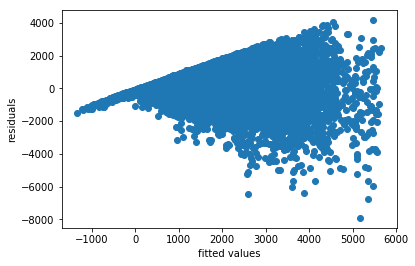


Model Report
RMSE : 1202
CV Score : Mean - 1203 | Std - 41.75 | Min - 1150 | Max - 1284


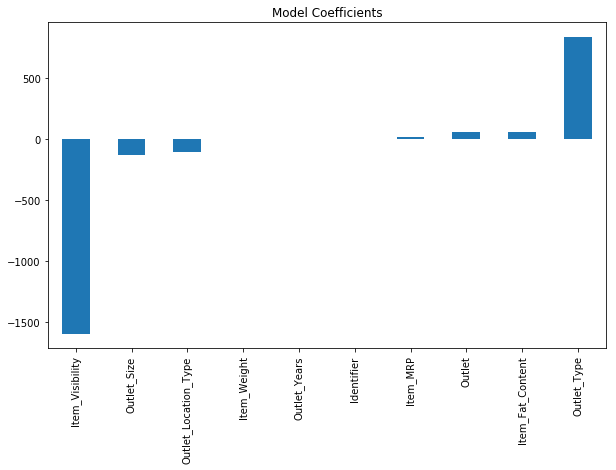

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
pred1 = np.nan
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv', resid=True)


coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize=(10,6))


#If you notice the coefficients, they are very large in magnitude which signifies overfitting. 
#To cater to this, we will use a ridge regression model.

## Residual vs fitted plot and model coefficients plot is given below

In [27]:
# As the residual vs fitted plot is funnel shaped, 
# the response variable suffers from non-constant variance
# We can do a log transformation, square root trasformation on the response variable
# to make it linear and to improve the model even further.

### Ridge Regression Model


Model Report
RMSE : 1204
CV Score : Mean - 1204 | Std - 43.05 | Min - 1149 | Max - 1290


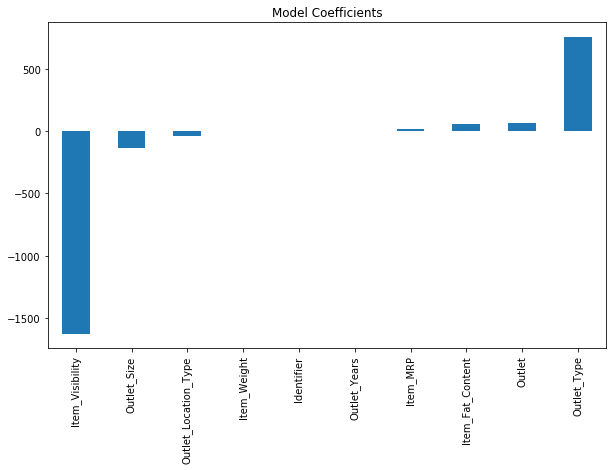

In [28]:
## lets take alpha 0.05 for now for both Ridge and Lasso

alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients', figsize=(10,6))
#The regression coefficient got better now, also the cross validation score has improved
#but the rmse didnt change much

### Lasso Regression Model


Model Report
RMSE : 1202
CV Score : Mean - 1203 | Std - 41.99 | Min - 1149 | Max - 1283


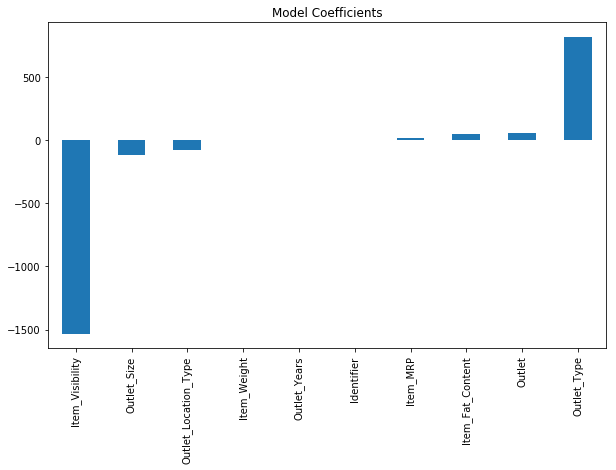

In [29]:
alg3 = Lasso(alpha=0.05,normalize=True)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.coef_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients', figsize=(10,6))

# It is seen here that the coefficients of some columns have decreased.
# But for some variables the coeffiecients has almost doubled than that of Ridge regression.
# Also the mean cross validation score has increased in comparison to Ridge.
# RMSE didn't change much

### Decision Tree Model


Model Report
RMSE : 1059
CV Score : Mean - 1093 | Std - 44.27 | Min - 1017 | Max - 1183


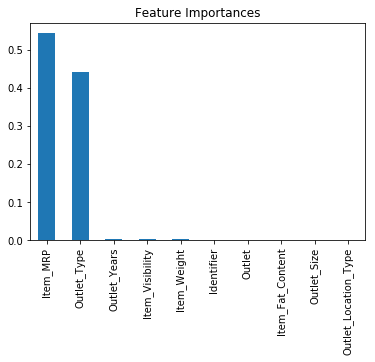

In [30]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg4 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [31]:
# Here you can see that the RMSE is 1059 and the mean CV error is 1093. 
# This tells us that the model is slightly overfitting. 
# Let's try making a decision tree with just top 3 variables, a max_depth of 8 and min_samples_leaf as 150.


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.34 | Min - 1027 | Max - 1172


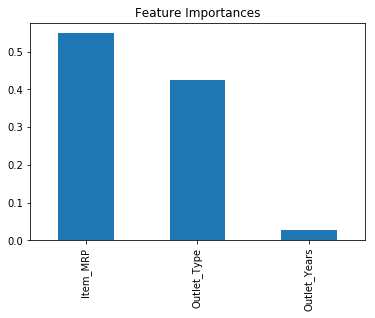

In [32]:
predictors = ['Item_MRP','Outlet_Type','Outlet_Years']
alg5 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### Random Forest Model


Model Report
RMSE : 1074
CV Score : Mean - 1084 | Std - 43.73 | Min - 1021 | Max - 1161


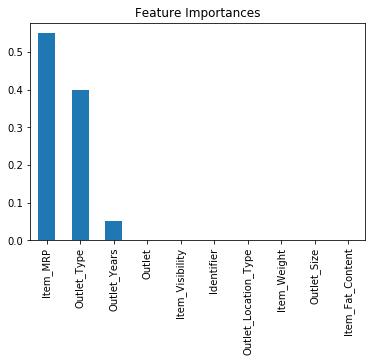

In [33]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

In [34]:
# Now let's try another random forest with max_depth of 6 and 400 trees. 
# Increasing the number of trees makes the model robust but is computationally expensive.


Model Report
RMSE : 1068
CV Score : Mean - 1082 | Std - 43.5 | Min - 1019 | Max - 1162


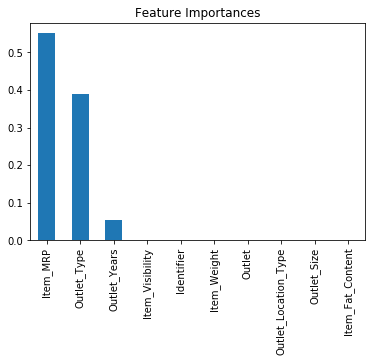

In [35]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg7 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')
coef7 = pd.Series(alg7.feature_importances_, predictors).sort_values(ascending=False)
coef7.plot(kind='bar', title='Feature Importances')

### XGBoost Model

In [36]:
from xgboost import XGBRegressor

alg8 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
alg8.fit(train[predictors], train[target], early_stopping_rounds=5, 
             eval_set=[(test[predictors], test[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
#Predict training set:
train_predictions = alg8.predict(train[predictors])

# make predictions
predictions = alg8.predict(test_df[predictors])

In [38]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train[target]).values, train_predictions)))

Mean Absolute Error : 78.65381844690134
RMSE : 1058


In [39]:
# The ML algorithm that performed the best was XGBoost with RMSE = 1058.
# So, we should choose that model and tune the hyperparameters in order to increase the accuracy